In [1]:
!pip install easyocr

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 37.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 102.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 80.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 71.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 422.8/422.8 kB 33.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.8/993.8 kB 24.0 MB/s eta 0:00:00


In [3]:
import cv2
import easyocr
from google.colab.patches import cv2_imshow
from matplotlib import pyplot as plt
from ultralytics import YOLO
import re

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
import numpy as np

In [10]:
video_path = 'scene10_front.mp4'
cap = cv2.VideoCapture(video_path)

if not cap.isOpened():
    print("Error: Could not open video.")
    exit()

In [11]:
reader = easyocr.Reader(['en'])

In [12]:

# Get video properties
fps = cap.get(cv2.CAP_PROP_FPS)
width  = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

print(f"FPS: {fps}, Width: {width}, Height: {height}")

# Define FourCC codec (put this BEFORE VideoWriter)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')  # 'mp4v' or 'XVID'

# Output video writer
out = cv2.VideoWriter('output_video.mp4', fourcc, fps, (width, height))

while True:
    ret, frame = cap.read()
    if not ret:
        break

    speed_center = None
    closest_number = None
    min_dist = float('inf')



    # Run OCR
    results = reader.readtext(frame)

    # First pass: Find 'SPEED'
    for bbox, text, conf in results:
        if text.upper() == 'SPEED':
            speed_center = np.mean(bbox, axis=0)
            break

    # Second pass: Find closest 2-digit number
    if speed_center is not None:
        for bbox, text, conf in results:
            if re.fullmatch(r'\d{2}', text):
                number_center = np.mean(bbox, axis=0)
                dist = np.linalg.norm(speed_center - number_center)
                if dist < min_dist:
                    min_dist = dist
                    closest_number = (bbox, text, conf)

    # Draw result
    if closest_number:
        bbox, text, conf = closest_number
        top_left = tuple(map(int, bbox[0]))
        bottom_right = tuple(map(int, bbox[2]))
        img = cv2.rectangle(frame, top_left, bottom_right, (0,255,0), 2)
        img = cv2.putText(frame, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
        print(f"Closest to SPEED: {text} (confidence: {conf:.2f})")


    # for bbox, text, conf in results:

    #     if re.fullmatch(r'\d{2}', text):  # 2-digit number detection
    #         top_left = tuple(map(int, bbox[0]))
    #         bottom_right = tuple(map(int, bbox[2]))
    #         frame = cv2.rectangle(frame, top_left, bottom_right, (0, 255, 0), 2)
    #         frame = cv2.putText(frame, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    out.write(frame)

cap.release()
out.release()


FPS: 35.99712023038157, Width: 1280, Height: 960
Closest to SPEED: 25 (confidence: 1.00)
Closest to SPEED: 25 (confidence: 1.00)
Closest to SPEED: 25 (confidence: 1.00)
Closest to SPEED: 25 (confidence: 1.00)
Closest to SPEED: 25 (confidence: 1.00)
Closest to SPEED: 25 (confidence: 0.93)
Closest to SPEED: 25 (confidence: 1.00)
Closest to SPEED: 25 (confidence: 1.00)
Closest to SPEED: 25 (confidence: 1.00)
Closest to SPEED: 25 (confidence: 1.00)
Closest to SPEED: 25 (confidence: 0.72)
Closest to SPEED: 25 (confidence: 1.00)
Closest to SPEED: 25 (confidence: 1.00)
Closest to SPEED: 25 (confidence: 1.00)
Closest to SPEED: 25 (confidence: 0.99)
Closest to SPEED: 25 (confidence: 1.00)


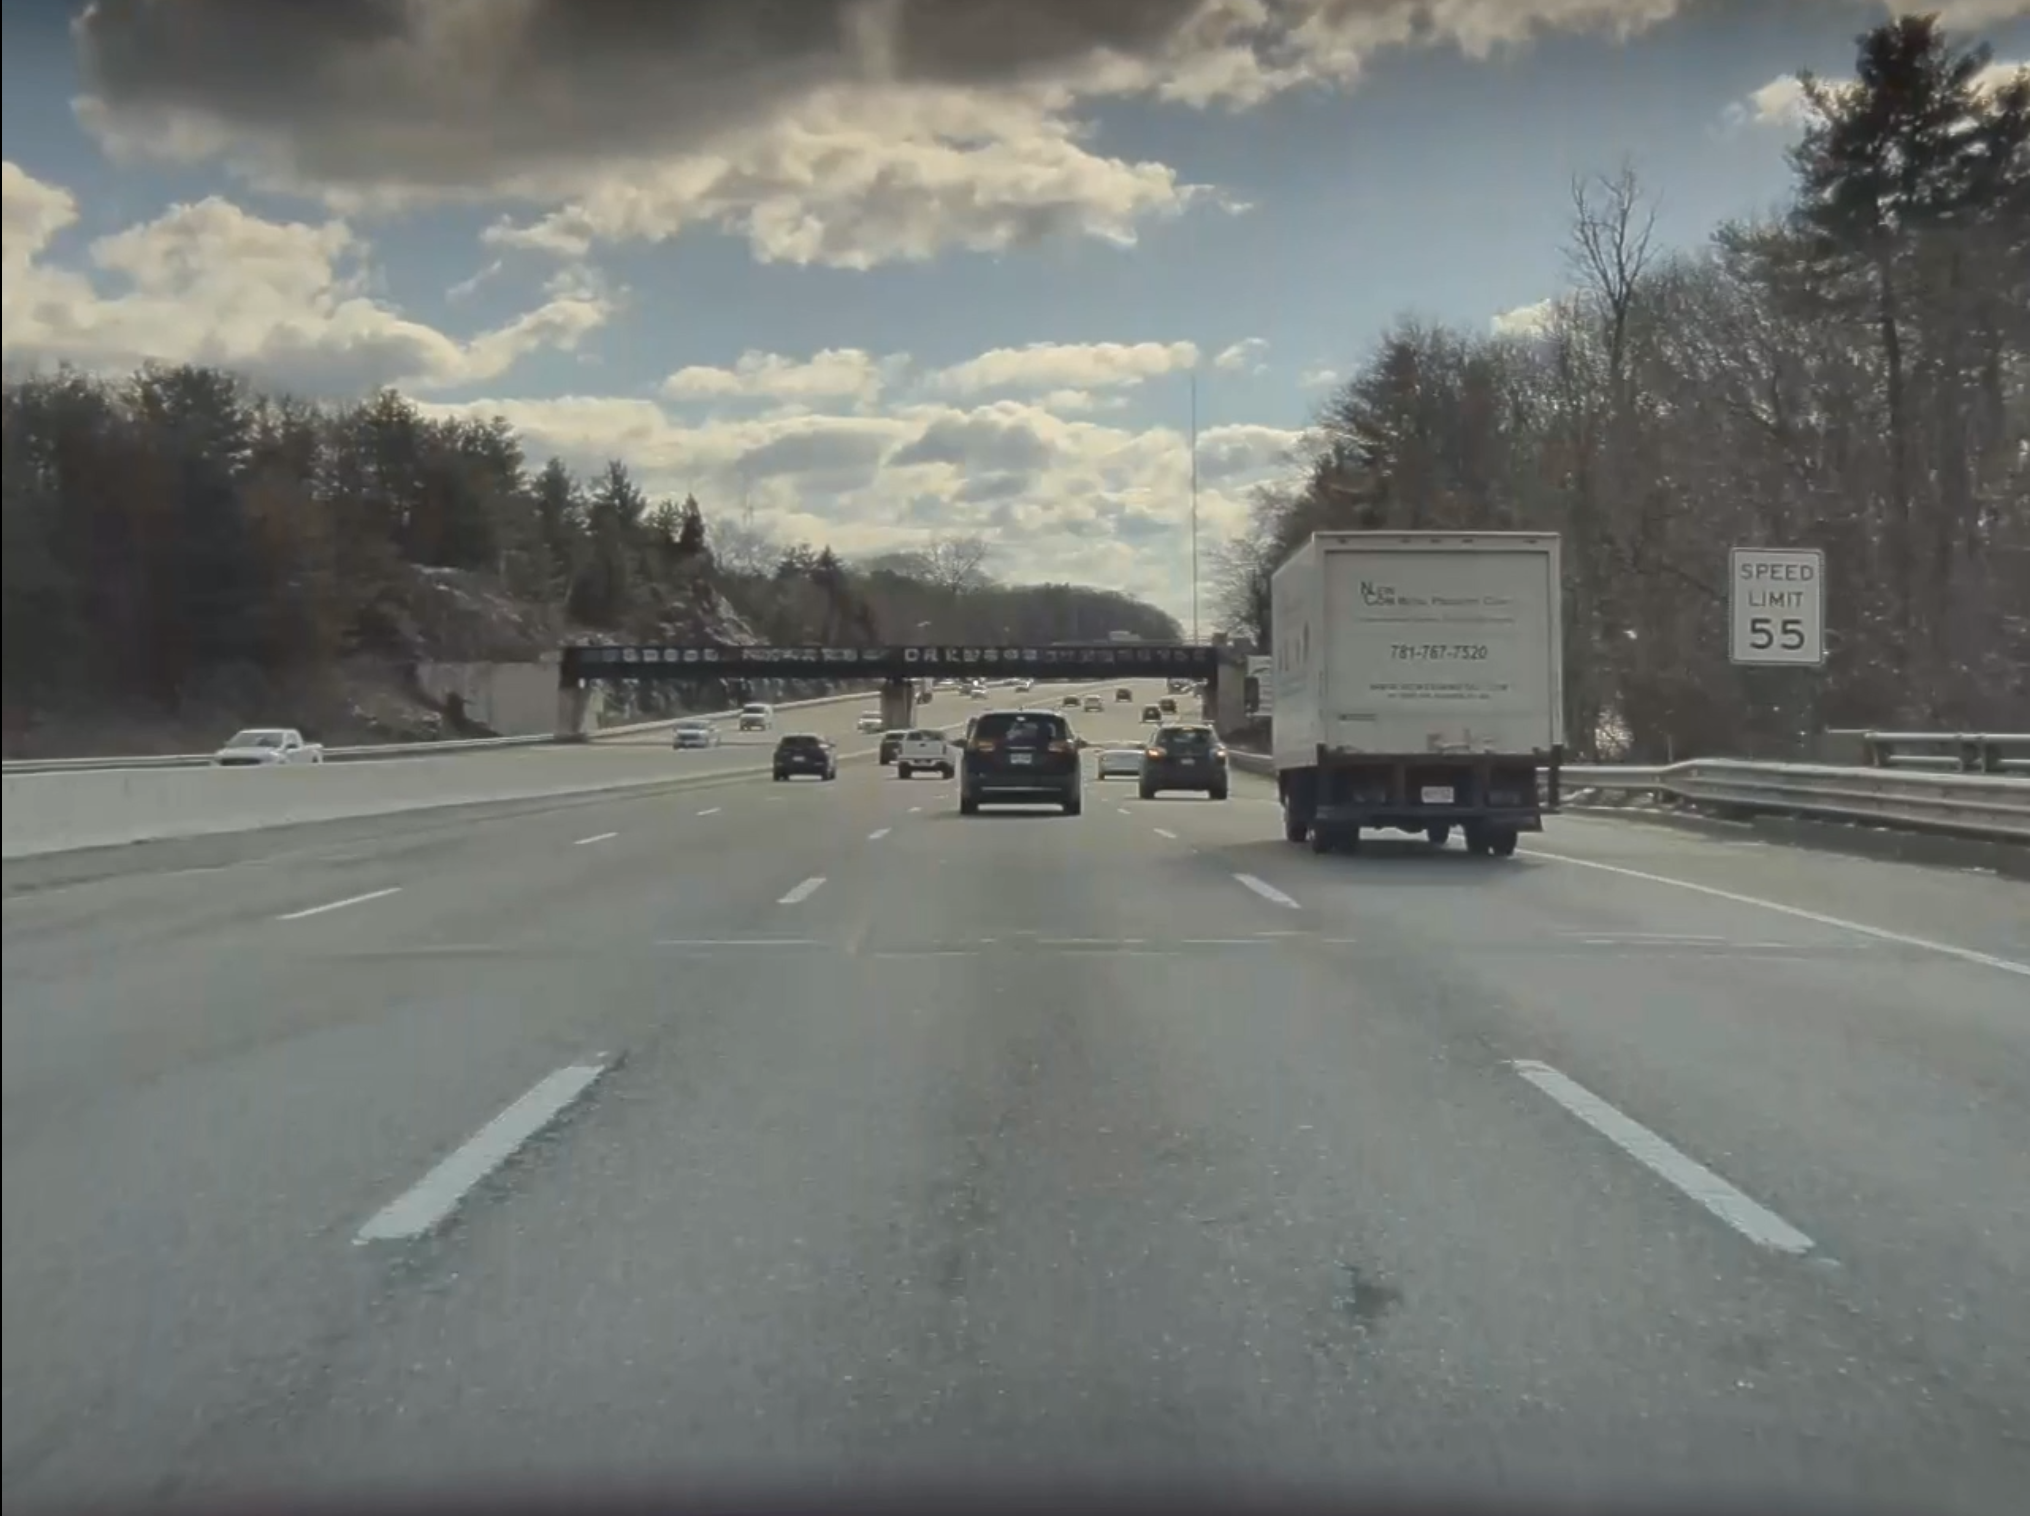

In [23]:
image = cv2.imread('speed.png')
cv2_imshow(image)

In [24]:
reader = easyocr.Reader(['en'])
results = reader.readtext(image)


In [25]:
print(len(results[2]))
print(results[2])

3
([[np.int32(1744), np.int32(586)], [np.int32(1806), np.int32(586)], [np.int32(1806), np.int32(610)], [np.int32(1744), np.int32(610)]], 'LkM', np.float64(0.3557790931631813))


In [21]:
# model = YOLO('yolo12n.pt')
# results = model(image)
# print(results)


0: 480x640 6 cars, 1 truck, 231.0ms
Speed: 6.3ms preprocess, 231.0ms inference, 1.5ms postprocess per image at shape (1, 3, 480, 640)
[ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'o

Detected: SPEED (confidence: 0.88)
SPEED
[[np.int32(1736), np.int32(560)], [np.int32(1816), np.int32(560)], [np.int32(1816), np.int32(584)], [np.int32(1736), np.int32(584)]]
Detected: 55 (confidence: 1.00)
55
[[np.int32(1745), np.int32(611)], [np.int32(1809), np.int32(611)], [np.int32(1809), np.int32(655)], [np.int32(1745), np.int32(655)]]


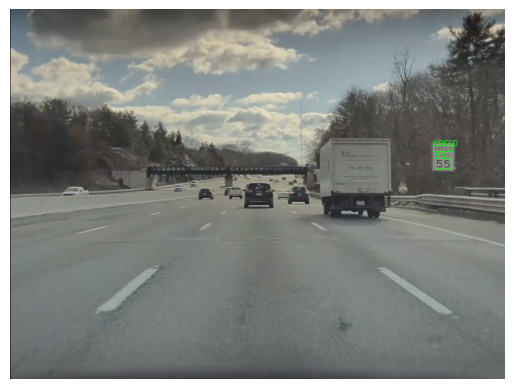

In [26]:
# Print results
for bbox, text, conf in results:
    if text == 'SPEED' or text.isdigit() == True and int(text) < 100 :

      print(f"Detected: {text} (confidence: {conf:.2f})")
      top_left = tuple(map(int, bbox[0]))
      bottom_right = tuple(map(int, bbox[2]))
      img = cv2.rectangle(image, top_left, bottom_right, (0,255,0), 2)
      img = cv2.putText(image, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
      print(text)
      print(bbox)

# # Optional: Draw results
# for bbox, text, conf in results:
#     top_left = tuple(map(int, bbox[0]))
#     bottom_right = tuple(map(int, bbox[2]))
#     img = cv2.rectangle(image, top_left, bottom_right, (0,255,0), 2)
#     img = cv2.putText(image, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)

# Show image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

Closest to SPEED: 55 (confidence: 1.00)


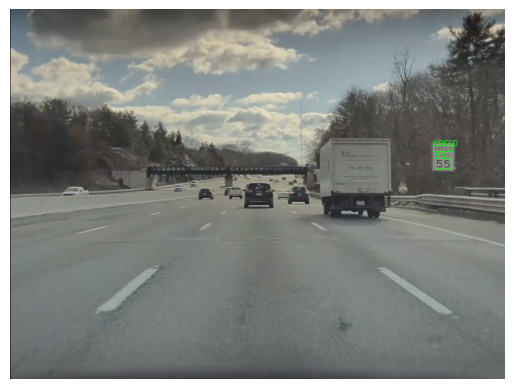

In [27]:
speed_center = None
closest_number = None
min_dist = float('inf')

# First pass: Find 'SPEED'
for bbox, text, conf in results:
    if text.upper() == 'SPEED':
        speed_center = np.mean(bbox, axis=0)
        break

# Second pass: Find closest 2-digit number
if speed_center is not None:
    for bbox, text, conf in results:
        if re.fullmatch(r'\d{2}', text):
            number_center = np.mean(bbox, axis=0)
            dist = np.linalg.norm(speed_center - number_center)
            if dist < min_dist:
                min_dist = dist
                closest_number = (bbox, text, conf)

# Draw result
if closest_number:
    bbox, text, conf = closest_number
    top_left = tuple(map(int, bbox[0]))
    bottom_right = tuple(map(int, bbox[2]))
    img = cv2.rectangle(image, top_left, bottom_right, (0,255,0), 2)
    img = cv2.putText(image, text, top_left, cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255,0), 2)
    print(f"Closest to SPEED: {text} (confidence: {conf:.2f})")

# Show the image
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()